1. Assume that x, ε ∼ i.i.d.N (0, 1) and let y = x + ε.
(a) Consider the regression y = βx + ε. Does this model satisfy the assumptions of the classical
and/or asymptotic OLS models?
Which OLS model is appropriate in this case?
What are the theoretical properties of the OLS estimator ˆβ?
What is the theoretical standard error of ˆβ for a sample size T ?

The formulation of this dataset would be a perfect candidate for linear regression. It is important to note that the regression constant is missing from the formulation, however, because we are certain that the regression is centered around zero it will not have an impact in this case. Normally, lack of a constant is a bad idea. 
  
Assumption 1: Functional Form  
    The functional form is linear, so this is satisfied.   

Assumption 2,3,4: Constant Variance, IID errors, normal errors  
    The errors in this case come from a N(0,1) distribution and are independent of the X. The errors will be homoskedastic with mean 0. They will also be independent, and normal.  
  
Assumption 5: Collinearity   
    There is only one variable so there is no issue.  
    
Assumption 6: Exogeneity    
    Y is strictly dependent on X, so Y is exogenous.   
  


Theoretical Properties of Beta_hat:  

Expectation:
Under no violated assumptions we have: $E[ \hat\beta | X ] = \beta $

Variance:
Under homoskedasticity: $ V = \sigma^2(X'X)^{-1} $

In [1]:
def fit_regression(x,y):
    beta = (1/(x @ x)) * (x.T @ y)
    return beta

In [1]:
import scipy.stats as ss
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np 

/tmp/ipykernel_5584/2367365807.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


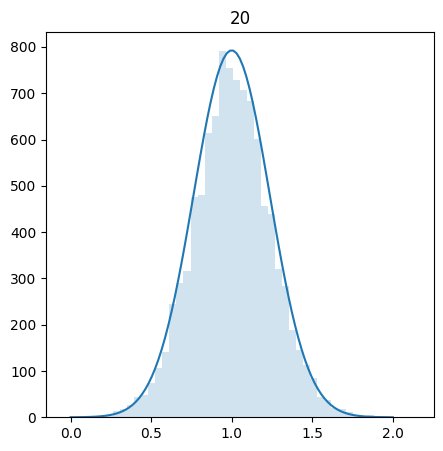

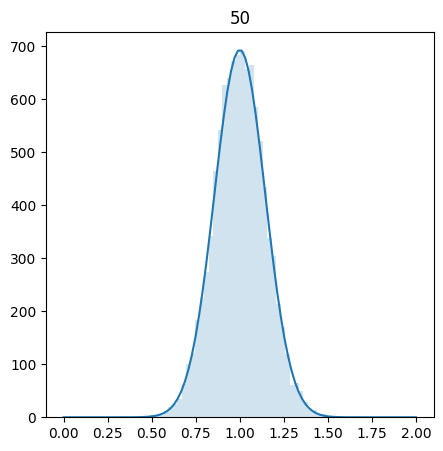

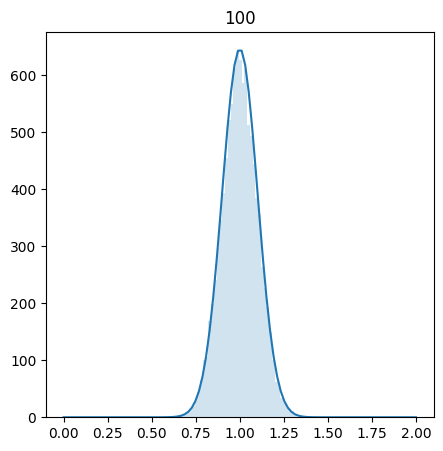

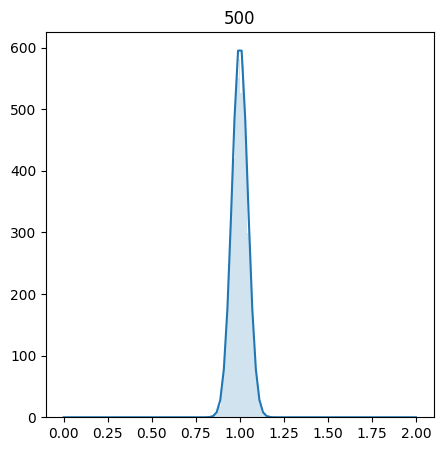

In [4]:
for t in [20, 50, 100, 500]:
    obs = []
    var = []
    for i in range(10_000):
        rv_x = np.random.normal(0, 1, t)
        rv_e = np.random.normal(0, 1, t)
        rv_y = rv_x + rv_e
        theo_var = 1/(rv_x @ rv_x)
        beta = fit_regression(rv_x, rv_y)

        var.append(theo_var)
        obs.append(beta)
        
    var = np.mean(var)
    x = np.linspace(0, 2, 100)

    fig, ax = plt.subplots(figsize = (5,5))

    frq, edges = np.histogram(obs, bins=50)
    ax.bar(edges[:-1], frq, width=np.diff(edges), align="edge", alpha=0.2)
                 
    ss_pdf = ss.norm(1, np.sqrt(var)).pdf(x)
    ax.plot(x, ss_pdf*np.max(frq)/np.max(ss_pdf))
    ax.set_title(f'{t}')
    fig.show()

In [ ]:
def t_test(beta, errors, x, percent):
    

/tmp/ipykernel_54064/2883769965.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_54064/2883769965.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_54064/2883769965.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_54064/2883769965.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_54064/2883769965.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_54064/2883769965.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


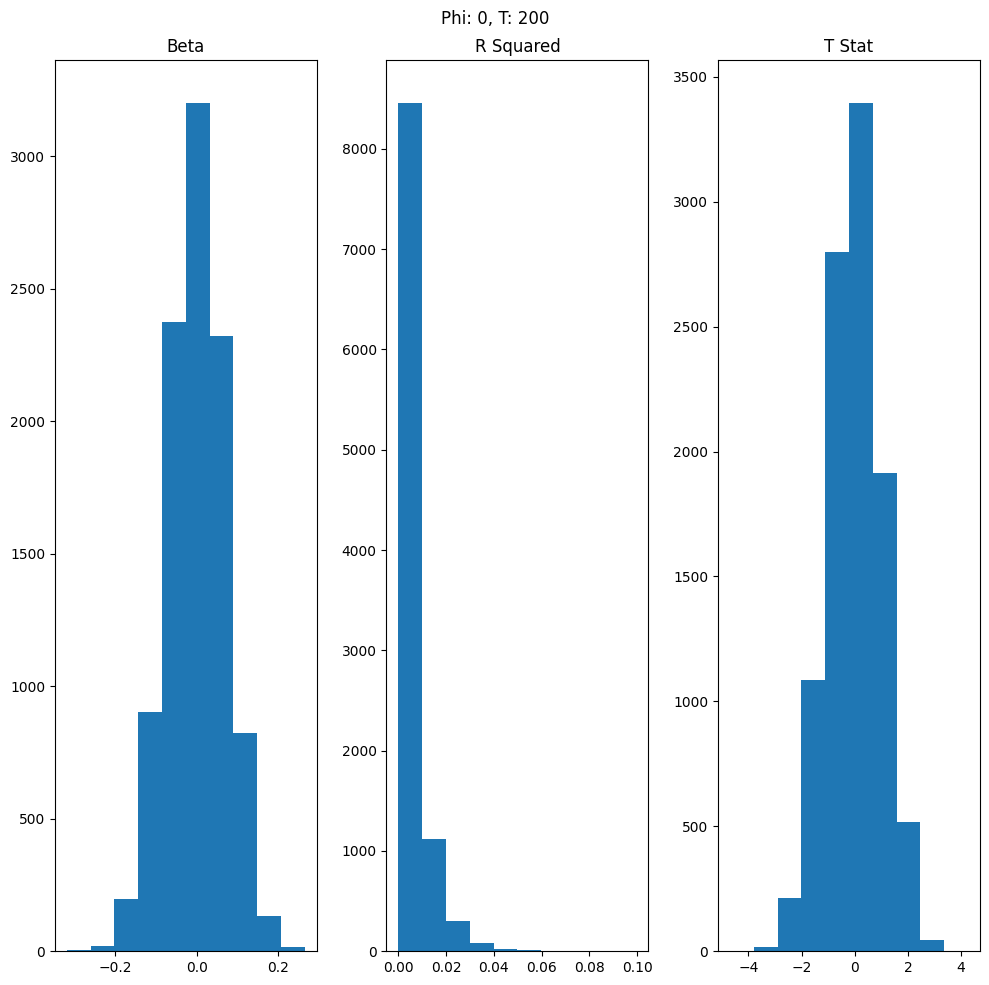

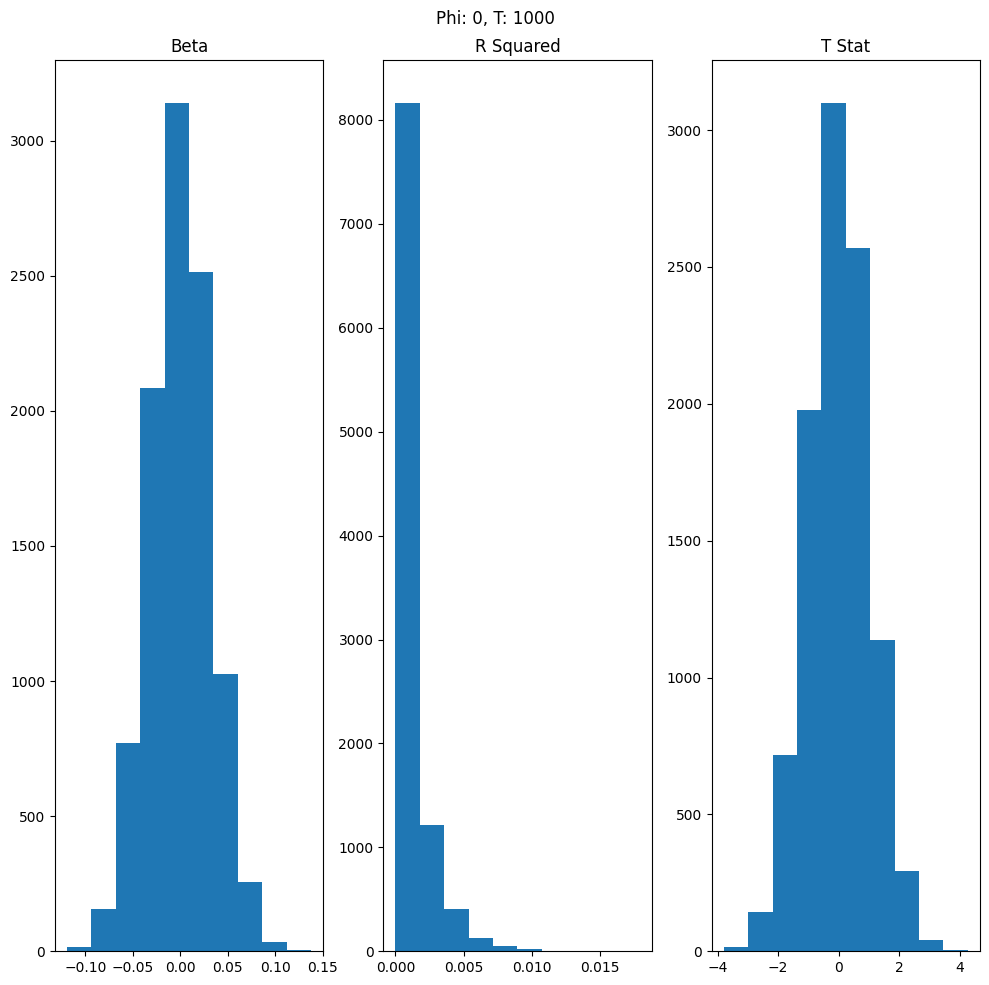

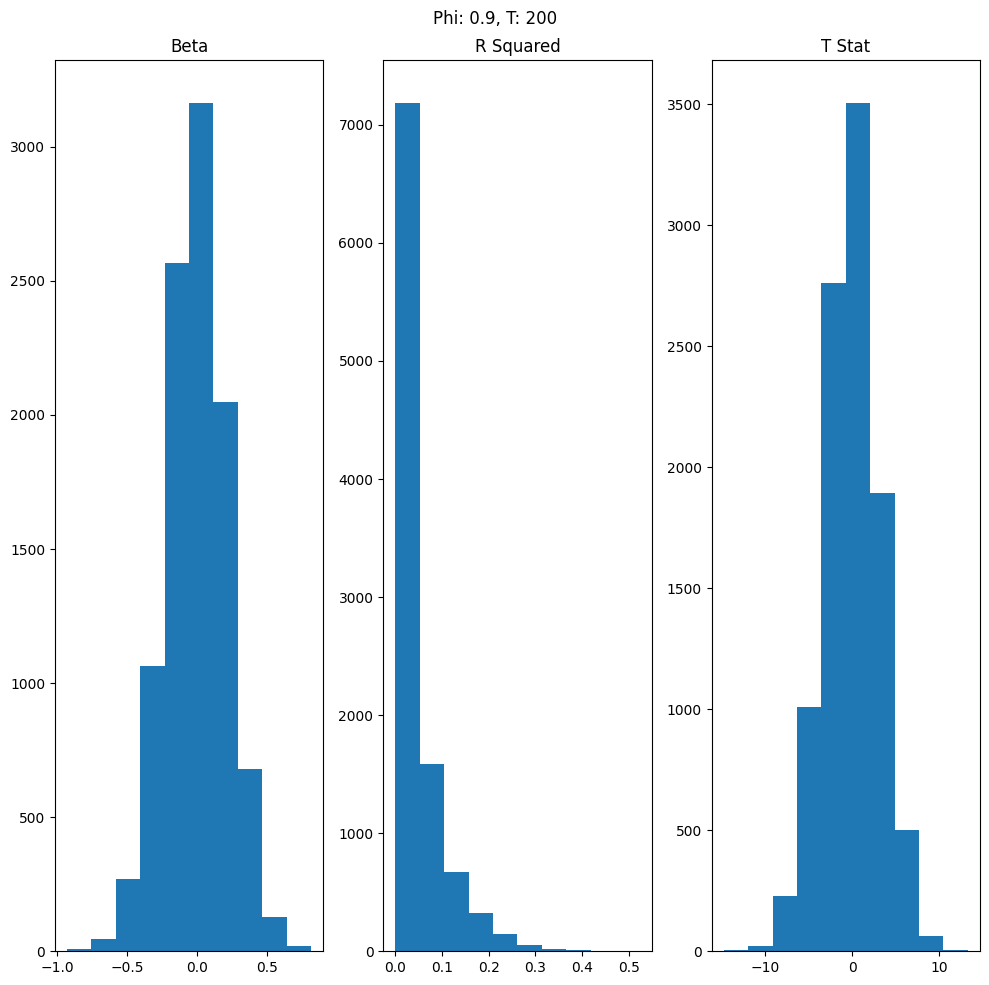

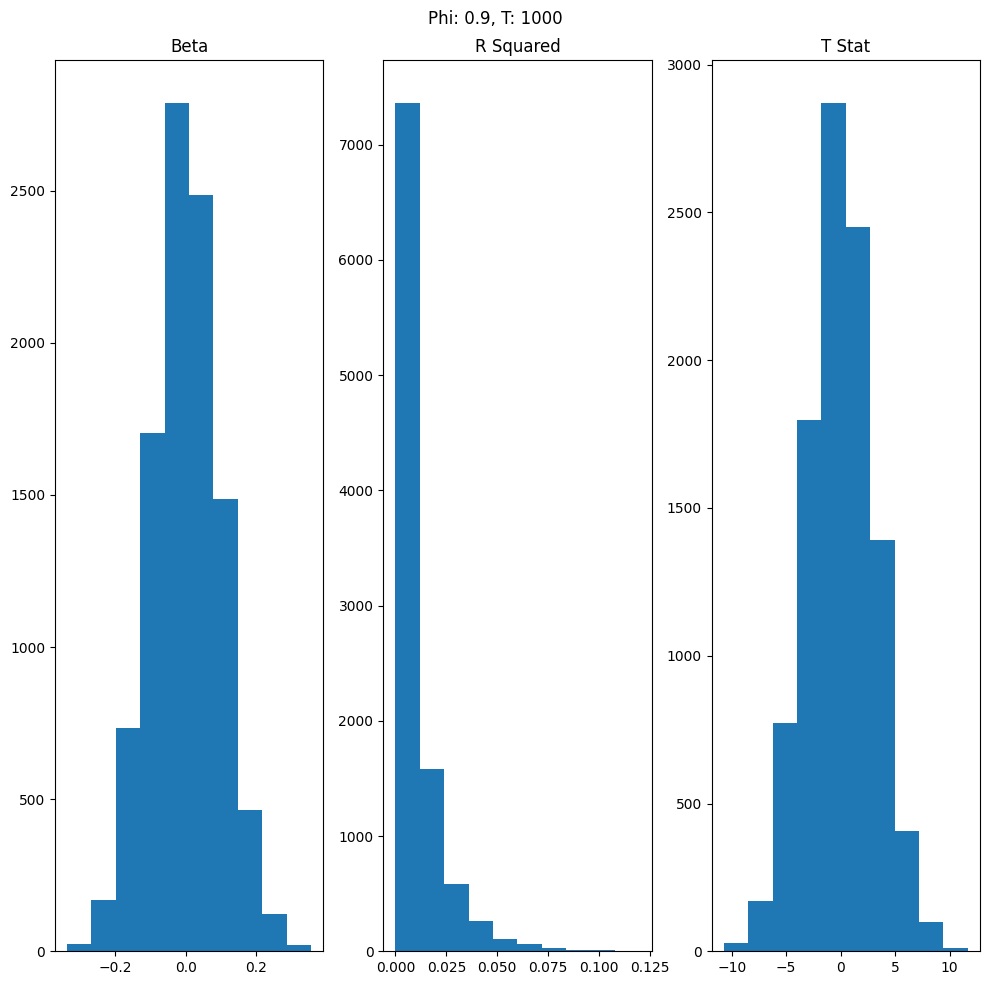

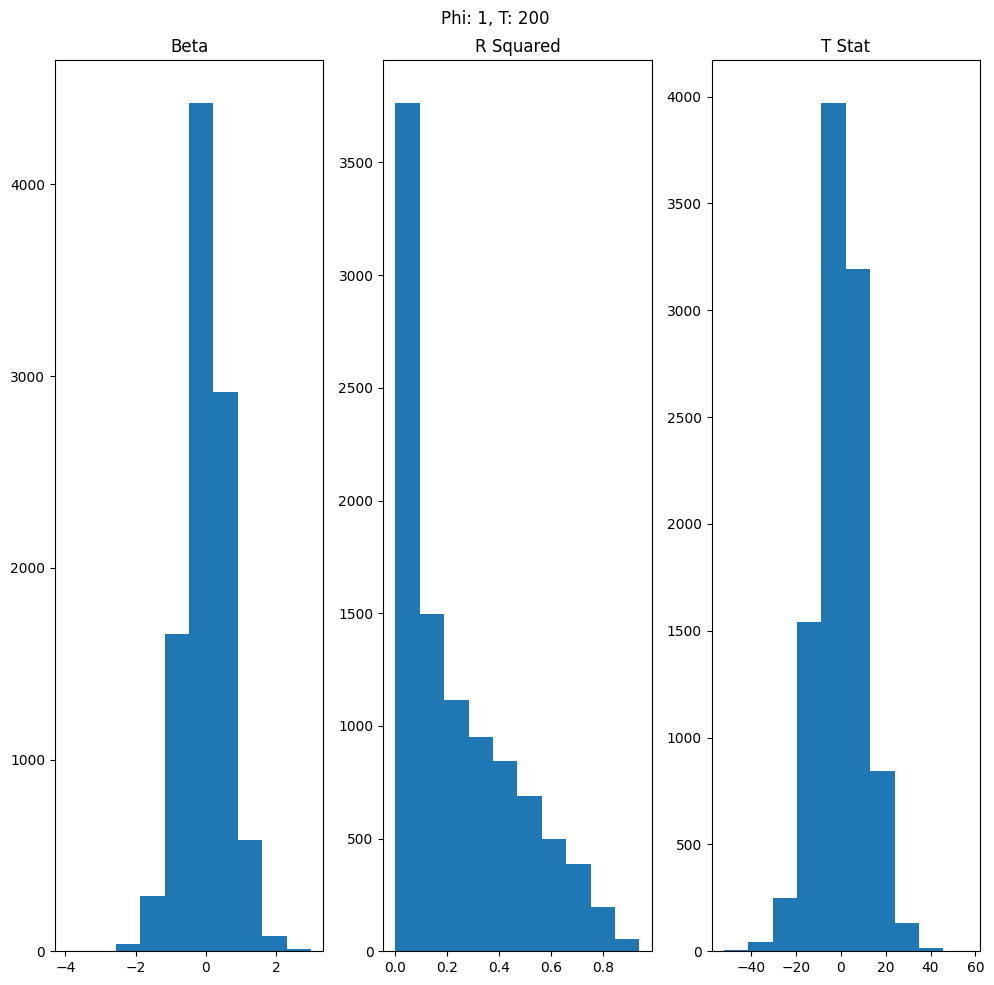

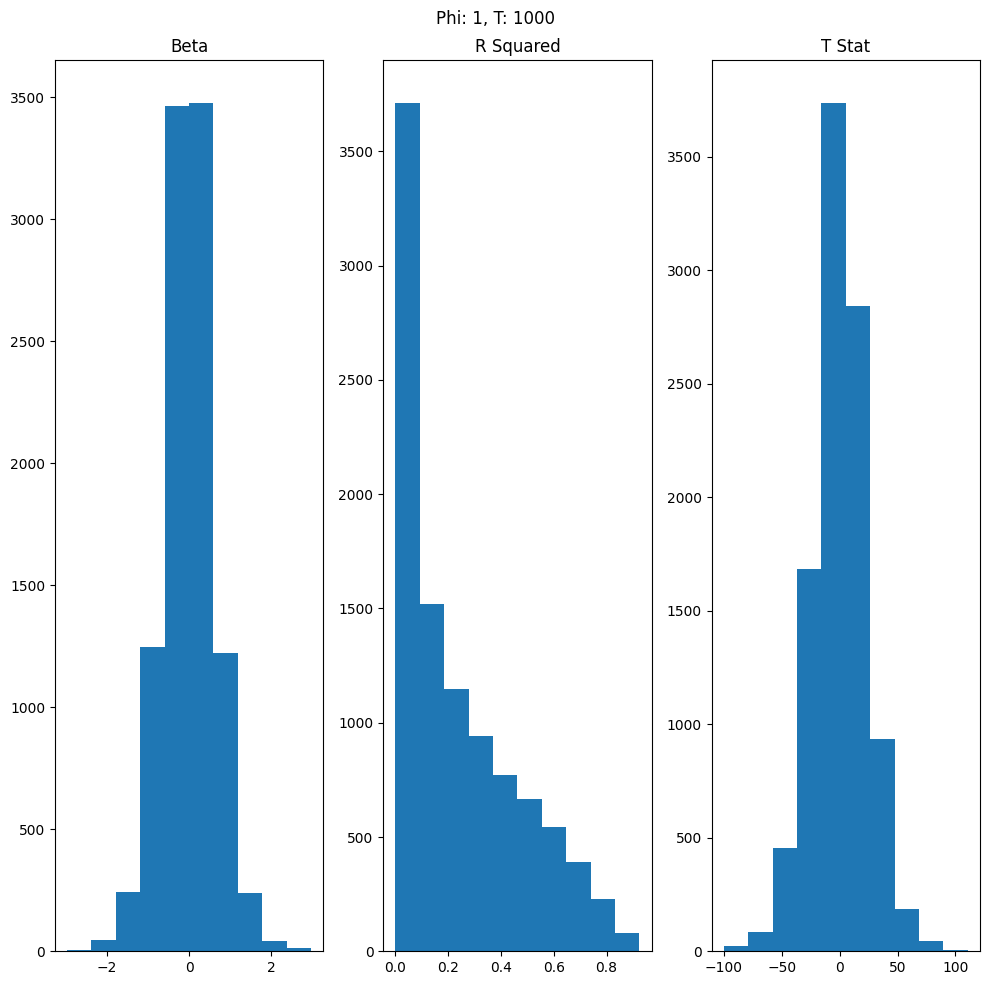

In [4]:
for phi in [0, 0.9, 1]:
    for t in [200, 1000]:
        betas = []
        rs = []
        ts = []
        for _ in range(10_000):
            data_x = ArmaProcess.from_coeffs(phi, 0).generate_sample(nsample=t)
            data_y = ArmaProcess.from_coeffs(phi, 0).generate_sample(nsample=t)
    
            X = np.array([np.ones(len(data_x)), data_x]).T
            y = data_y
    
            beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
            e = y - (X @ beta )
            r_2 = 1 - (np.var(e) / np.var(y))
            
            betas.append(beta[1])
            rs.append(r_2)

            sigma2 = np.sum(e**2) / (t - 1)
            var_beta_homoskedastic = sigma2 * np.linalg.inv(X.T @ X)

            t_stat = beta[1] / np.sqrt(var_beta_homoskedastic[1,1])

            ts.append(t_stat)

        fig, ax = plt.subplots(1, 3, figsize=(10,10))

        fig.suptitle(f'Phi: {phi}, T: {t}')
        ax[0].hist(betas)
        ax[0].set_title('Beta')
    
        ax[1].hist(rs)
        ax[1].set_title('R Squared')
        ax[2].hist(ts)
        ax[2].set_title('T Stat')
        fig.tight_layout()
        fig.show()

    for alpha in [0.01,0.05,0.1]:
        crit = t.ppf(1-alpha/2, 1)
        
        print( t_stat < crit

In [ ]:
from scipy.stats import t

rej_percentage=[]
for phi in [0, 0.9, 1]:
    for alpha in [0.01,0.05,0.1]:
        crit = t.ppf(1-alpha/2, j-2)


for phi in [0, 0.9, 1]:
    for col,j in enumerate(T):
        t_stat = t_stats.loc[index,col]
        rej_percentage.loc[i,j]=[np.sum(np.abs(t_stat)>critical.loc[j,0.01])/10000,np.sum(np.abs(t_stat)>critical.loc[j,0.05])/10000,\
        np.sum(np.abs(t_stat)>critical.loc[j,0.1])/10000]


In [80]:
X = np.array([np.ones(len(data_x)), data_x])

array([-10.05509468,   0.14482623])